# DATA DESC
The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

Can you predict if the customer is going to honor the reservation or cancel it ?
#### 
https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

# DATA DICTIONARY
The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below.
####
Data Dictionary:

- Booking_ID: unique identifier of each booking - Drop
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not. -> later is turned into 1 and 0
    - 1 = cancelled
    - 0 = not cancelled

# GOAL
To predict which customers will honor their reservation (would not cancel) - Should be supervised, we can use Decision Tree or Random Forest Classifier

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
#Size for graphs/visualization used
plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True

In [4]:
data = pd.read_csv('Hotel Reservations.csv')
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

I am Dropping the Booking_ID because it would not be included in machine learning. other than that, it does not provide additional insights

In [6]:
# Checking for missing values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

No indication of missing values in this dataset

# 1. Data Profiling

## Descriptive Profiling

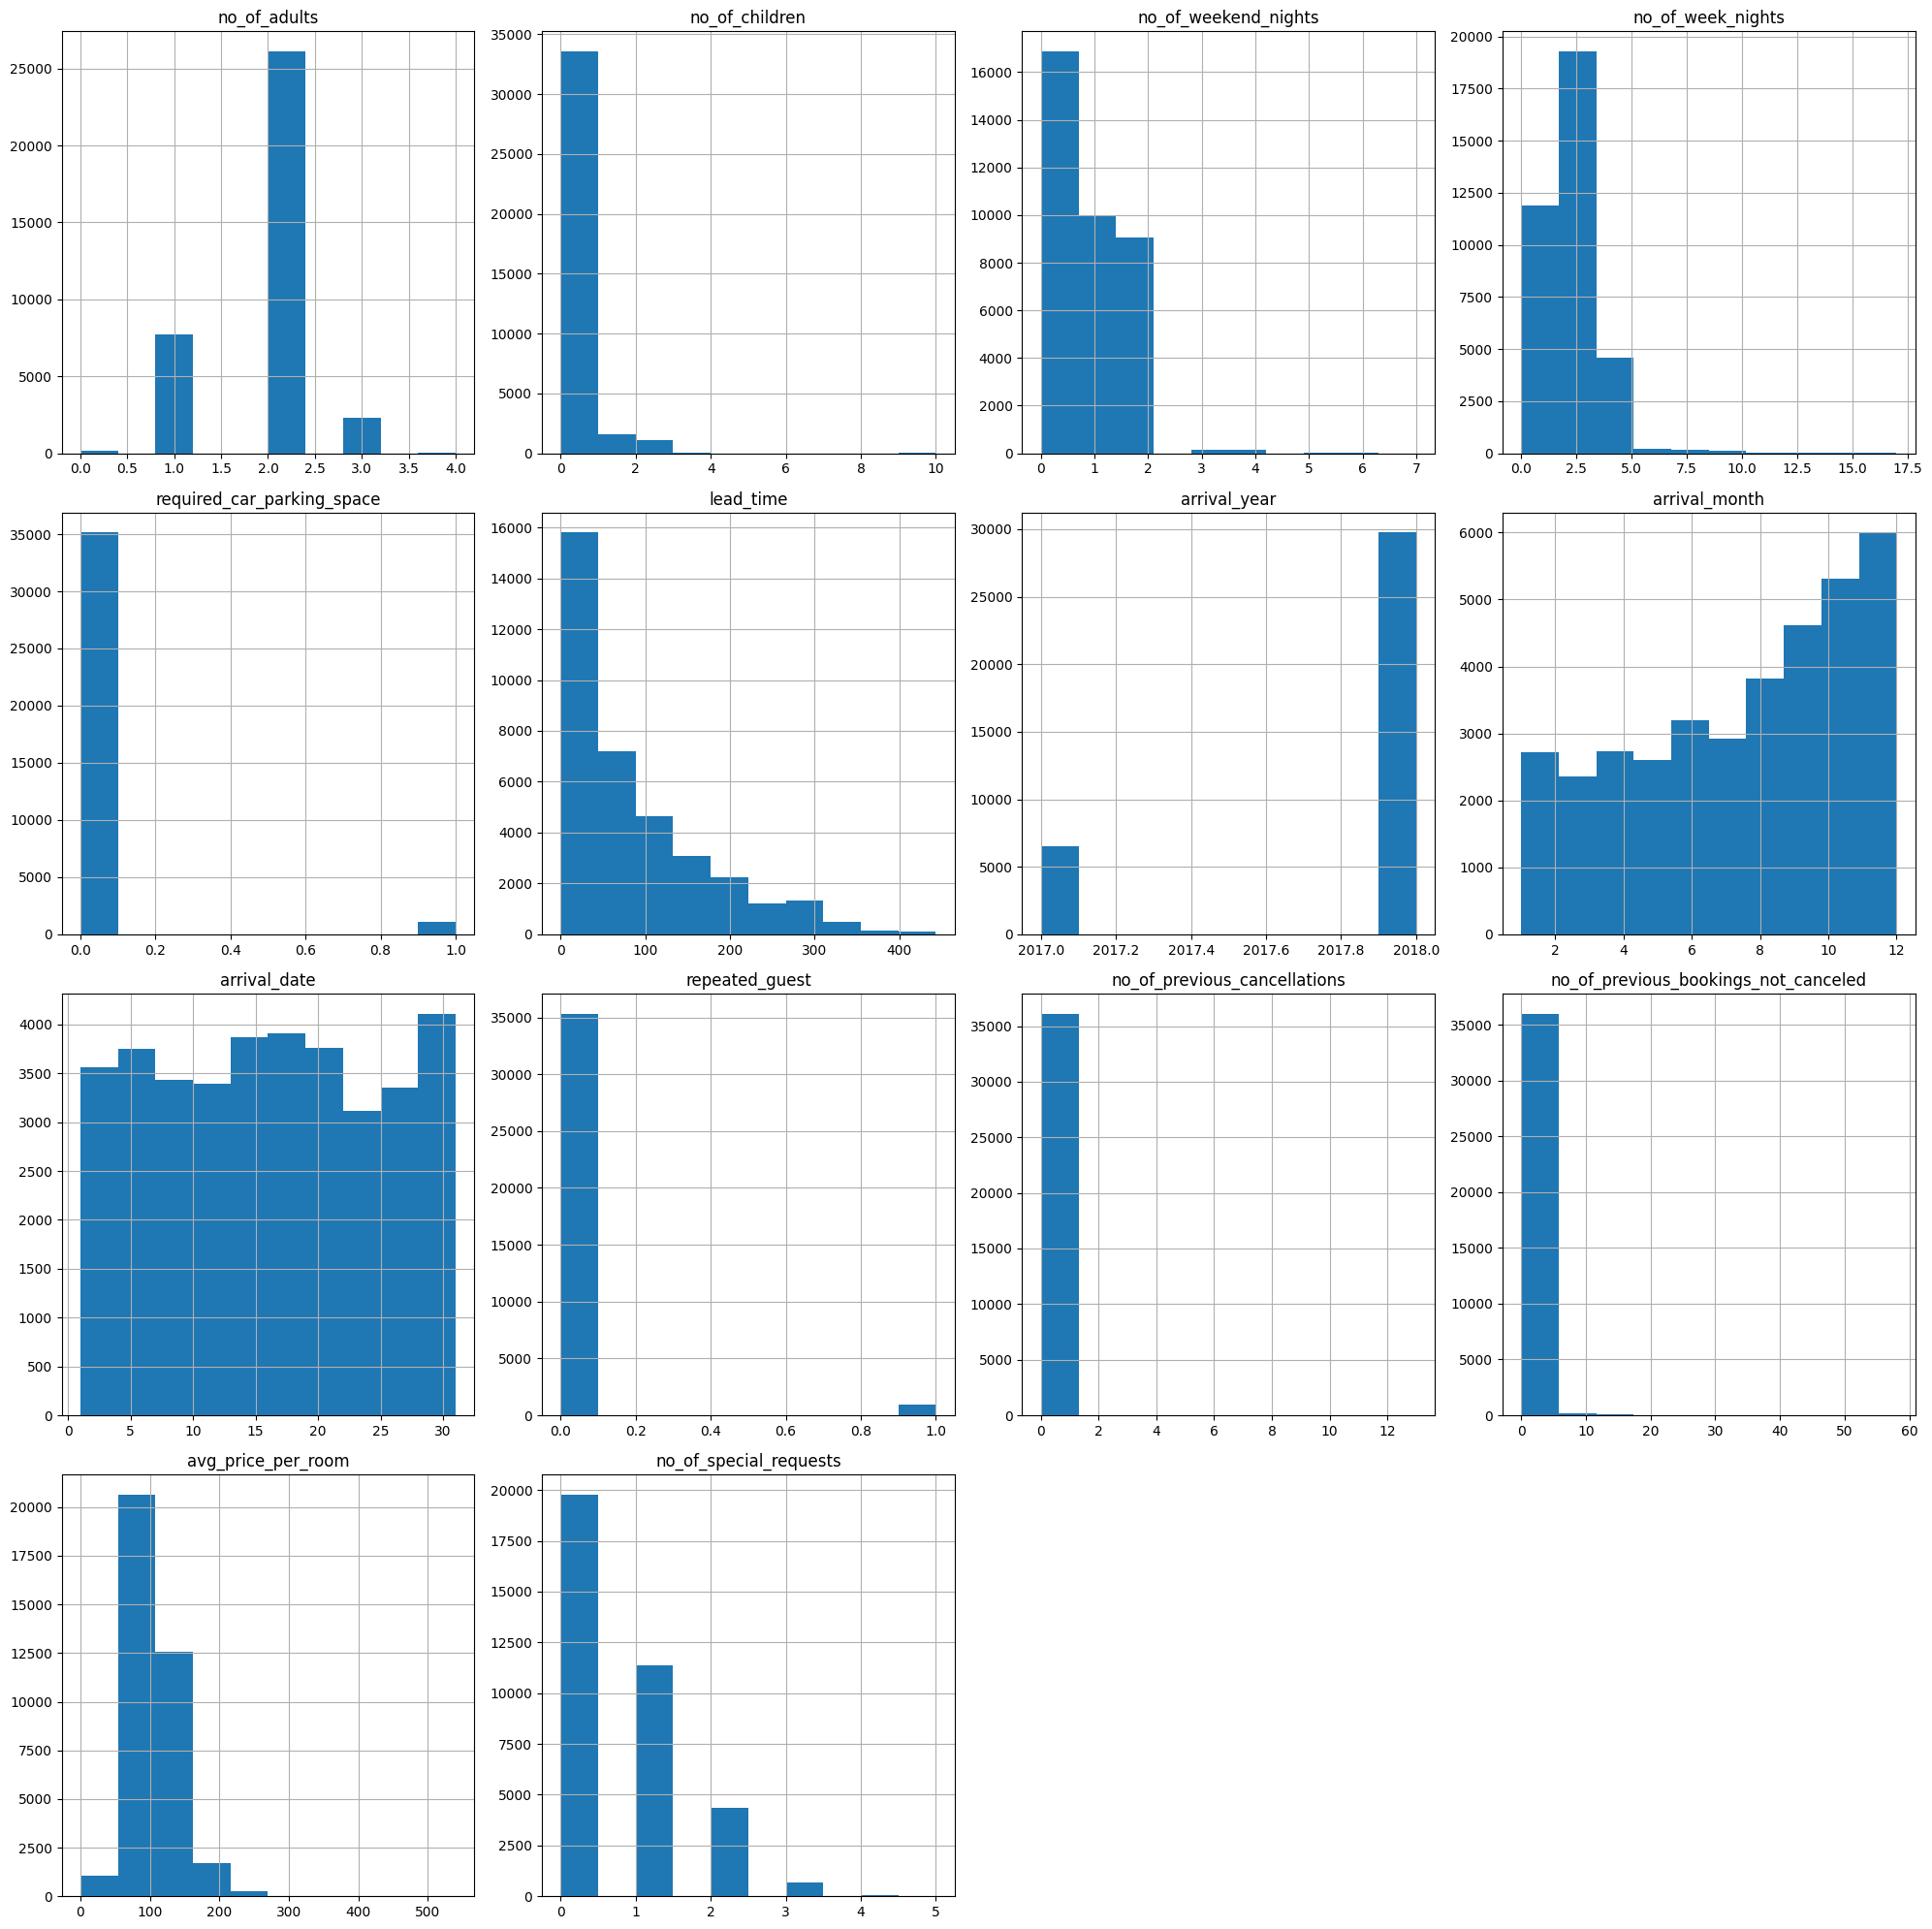

In [7]:
# Distribution of each features
data.hist()
plt.show()

In [8]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Average pricing for the room can not be 0. As the data suggested, the minimum number is 0, therefore we need to treat it as a missing value

In [9]:
# Finding and treating missing values
data.loc[data['avg_price_per_room']==0]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,INN00064,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,INN00210,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,INN00268,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,INN36081,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,INN36115,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,INN36218,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


There are a total of 545 rows with 0 as a value in avg price room. I think it is safe to just fill it out mith median

In [10]:
data['avg_price_per_room'] = data['avg_price_per_room'].replace([0],data['avg_price_per_room'].median())

In [11]:
data['avg_price_per_room'].describe()

count    36275.000000
mean       104.917688
std         32.688889
min          0.500000
25%         81.000000
50%         99.450000
75%        120.000000
max        540.000000
Name: avg_price_per_room, dtype: float64

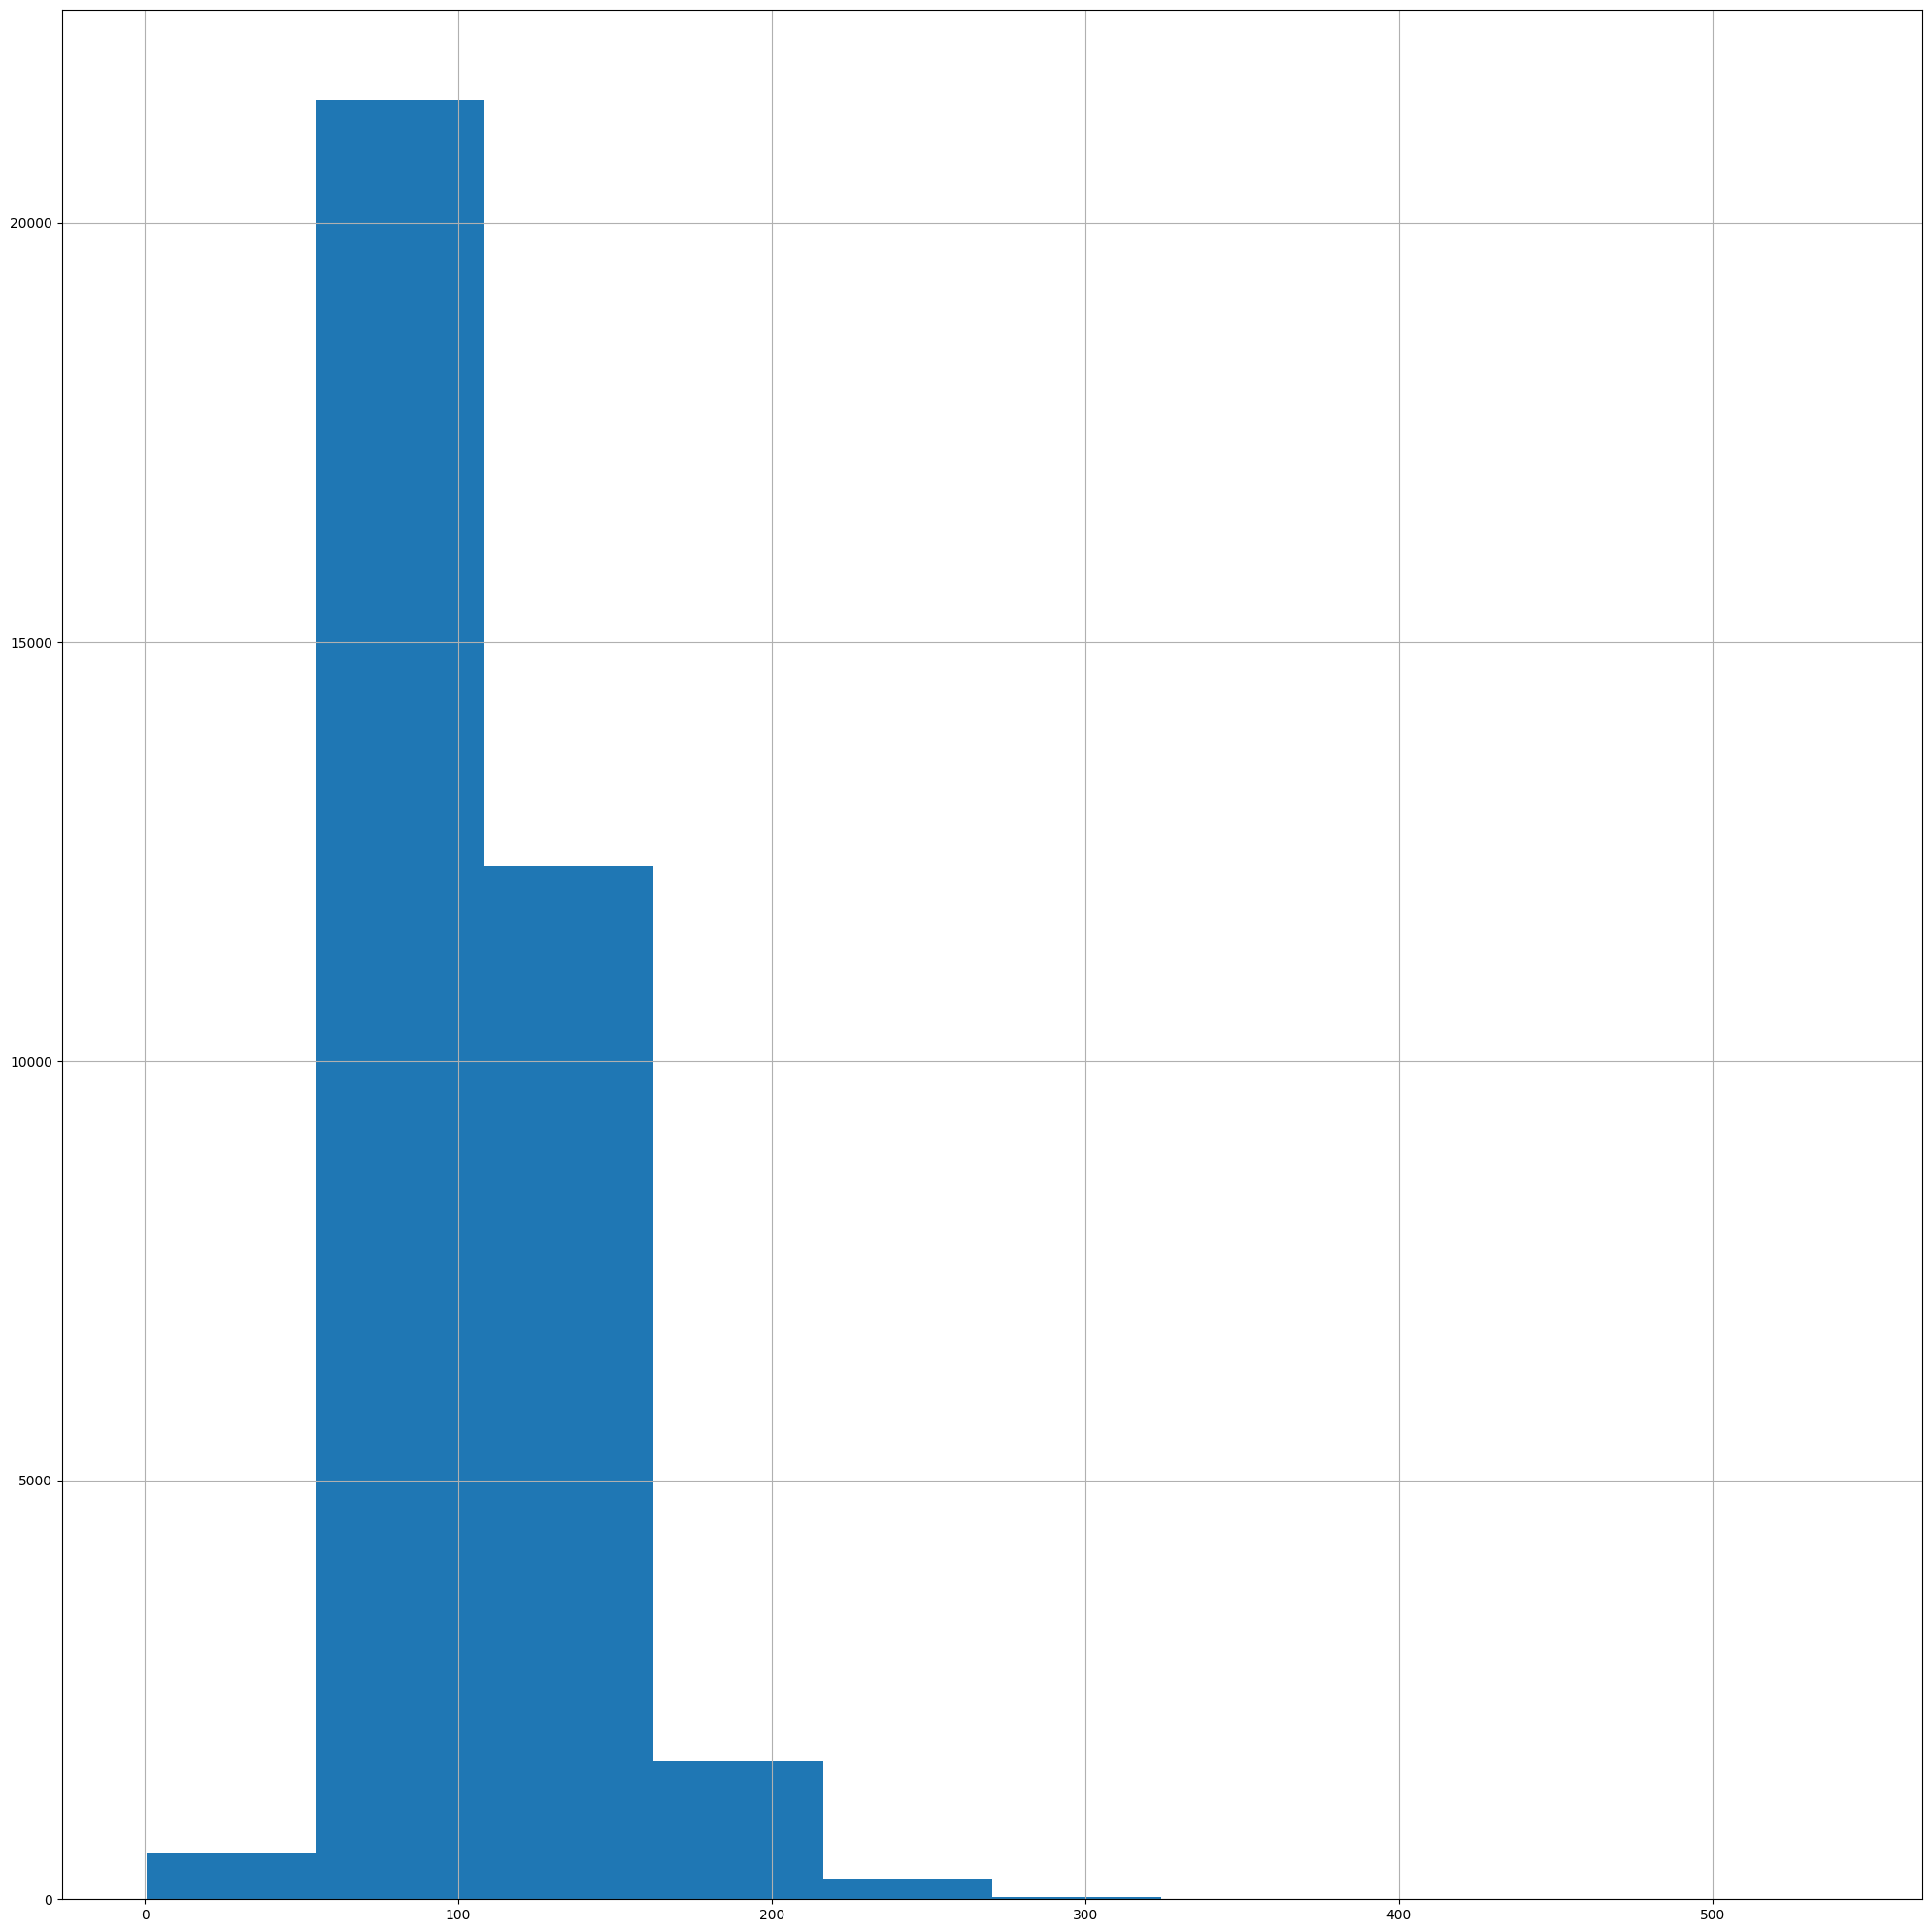

In [12]:
data['avg_price_per_room'].hist()
plt.show()

Setelah diisi dengan median, rata-rata dan standard deviasi tidak berubah jauh. Selain itu, persebarannya juga tidak berubah, tetap condong skewed ke kanan dan berkemungkinan menunjukkan outliers.

In [13]:
#Object data profiling
data.describe(include='O')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


## Checking Duplicated Data

In [14]:
data[data.duplicated()]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


There are no duplicated values. It is very much possible for all the features to have duplicates except the Booking_ID. from here, we can conclude that there is no cuplicated values.

## Checking if the data is balance or not

In [15]:
data.groupby('booking_status').size()

booking_status
Canceled        11885
Not_Canceled    24390
dtype: int64

In [16]:
data['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

Data yang diberikan memiliki ketimpangan 67 banding 33 persen. Ini menunjukkan data imbalance sehingga akan dilakukan oversampling dengan SMOTE saat merancang model Machine Learning.

## Simplifying Features Name

In [17]:
# Before renaming features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [18]:
data.rename(columns={'no_of_adults':'adults'},inplace=True)
data.rename(columns={'no_of_children':'children'},inplace=True)
data.rename(columns={'no_of_weekend_nights':'weekend_nights'},inplace=True)
data.rename(columns={'no_of_week_nights':'weekday_nights'},inplace=True)
data.rename(columns={'type_of_meal_plan':'meal_plan'},inplace=True)
data.rename(columns={'no_of_weekend_nights':'weekend_nights'},inplace=True)
data.rename(columns={'no_of_special_requests':'special_requests'},inplace=True)
data.rename(columns={'market_segment_type':'market_type'},inplace=True)
data.rename(columns={'special_requests':'request_num'},inplace=True)

In [19]:
data.rename(columns={'required_car_parking_space':'parking_space'},inplace=True)

In [20]:
data.rename(columns={'room_type_reserved':'room_type'},inplace=True)
data.rename(columns={'avg_price_per_room':'avg_room_price'},inplace=True)

In [21]:
#after renaming
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   adults                                36275 non-null  int64  
 2   children                              36275 non-null  int64  
 3   weekend_nights                        36275 non-null  int64  
 4   weekday_nights                        36275 non-null  int64  
 5   meal_plan                             36275 non-null  object 
 6   parking_space                         36275 non-null  int64  
 7   room_type                             36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

## Finding Outliers

In [22]:
data.describe()

,adults,children,weekend_nights,weekday_nights,parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_room_price,request_num
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,104.917688,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,32.688889,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,81.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [23]:
plt.rcParams["figure.figsize"] = [8, 8]
plt.rcParams["figure.autolayout"] = True

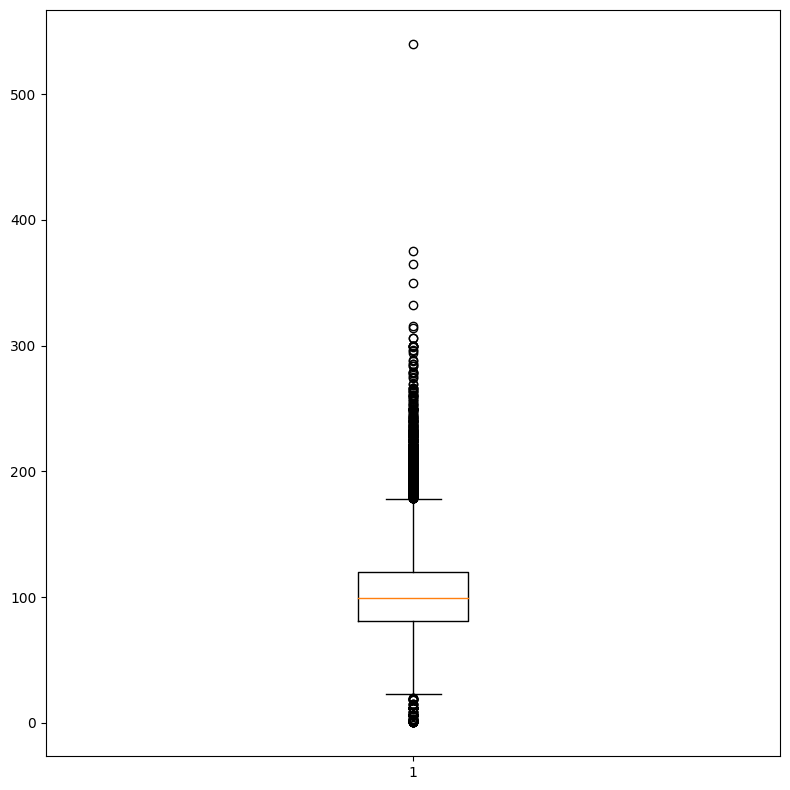

In [24]:
plt.boxplot(data['avg_room_price'])
plt.show()

In [25]:
Q1 = np.percentile(data.avg_room_price,25)
Q3 = np.percentile(data.avg_room_price,75)
IQR = (Q3-Q1)
print("IQR sama dengan", IQR)

IQR sama dengan 39.0


In [26]:
Lbound = Q1-(IQR*1.5)
Ubound = Q3+(IQR*1.5)
print('Lower Bound =',Lbound)
print('Upper Bound =',Ubound)

Lower Bound = 22.5
Upper Bound = 178.5


In [27]:
data.loc[(data['avg_room_price']<Lbound)]

,Booking_ID,adults,children,weekend_nights,weekday_nights,meal_plan,parking_space,room_type,lead_time,arrival_year,arrival_month,arrival_date,market_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_room_price,request_num,booking_status
165,INN00166,1,0,2,1,Meal Plan 2,0,Room_Type 1,23,2018,1,2,Online,0,0,0,1.00,0,Not_Canceled
486,INN00487,2,0,2,0,Meal Plan 1,0,Room_Type 1,34,2018,2,28,Complementary,0,0,0,6.50,1,Not_Canceled
937,INN00938,0,2,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,6.67,1,Not_Canceled
1275,INN01276,2,1,0,2,Meal Plan 1,0,Room_Type 4,43,2018,11,25,Complementary,0,0,0,20.00,2,Not_Canceled
1425,INN01426,1,0,0,2,Meal Plan 2,0,Room_Type 1,5,2018,3,8,Online,0,0,0,1.00,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35467,INN35468,1,0,0,2,Meal Plan 1,0,Room_Type 1,4,2018,2,23,Online,0,0,0,1.00,0,Not_Canceled
35557,INN35558,2,0,1,0,Meal Plan 1,0,Room_Type 1,4,2017,10,19,Online,0,0,0,12.00,0,Not_Canceled
35732,INN35733,1,0,1,2,Meal Plan 1,0,Room_Type 1,253,2018,9,26,Online,0,0,0,2.00,0,Not_Canceled
36164,INN36165,2,0,2,2,Meal Plan 1,0,Room_Type 1,1,2017,8,22,Online,0,0,0,12.00,0,Canceled


Outliers from the avg_room_price feature is not going to be removed because it will delete many informations and room price is dynamic and very much possible to have a big or low average on this

In [28]:
data.head()

,Booking_ID,adults,children,weekend_nights,weekday_nights,meal_plan,parking_space,room_type,lead_time,arrival_year,arrival_month,arrival_date,market_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_room_price,request_num,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# MAKING THE TARGET NUMERICAL

In [29]:
data['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [30]:
data['booking_status'] = data['booking_status'].replace(['Not_Canceled','Canceled'],[0,1])

In [31]:
data.head()

,Booking_ID,adults,children,weekend_nights,weekday_nights,meal_plan,parking_space,room_type,lead_time,arrival_year,arrival_month,arrival_date,market_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_room_price,request_num,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


In [32]:
data.describe()

,adults,children,weekend_nights,weekday_nights,parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_room_price,request_num,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,104.917688,0.619655,0.327636
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,32.688889,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,81.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


# EDA

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   adults                                36275 non-null  int64  
 2   children                              36275 non-null  int64  
 3   weekend_nights                        36275 non-null  int64  
 4   weekday_nights                        36275 non-null  int64  
 5   meal_plan                             36275 non-null  object 
 6   parking_space                         36275 non-null  int64  
 7   room_type                             36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [34]:
cancel = data.loc[data['booking_status']==1]
nocancel = data.loc[data['booking_status']==0]

## Total Cancellation

In [35]:
total = data.groupby('booking_status')[['adults']].count().reset_index()
total

,booking_status,adults
0,0,24390
1,1,11885


<function matplotlib.pyplot.show(close=None, block=None)>

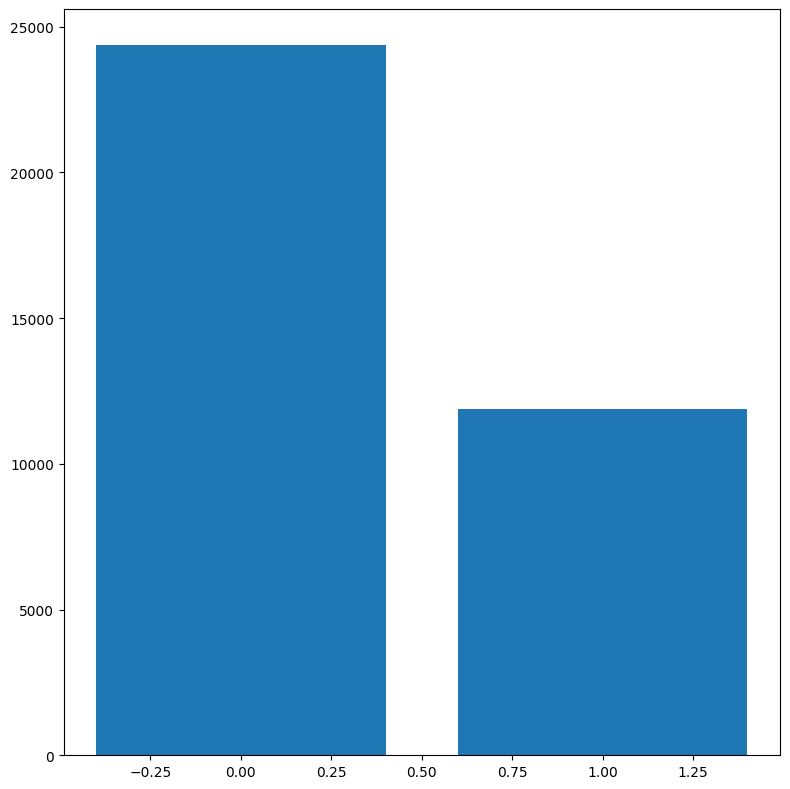

In [36]:
plt.bar(total['booking_status'],total['adults'])
plt.show

## How Many Adults Cancel/not

In [37]:
#Number of adults brought that cancel their reservation
adult = cancel.groupby('adults')[['booking_status']].count().reset_index()
adult

,adults,booking_status
0,0,44
1,1,1856
2,2,9119
3,3,863
4,4,3


<AxesSubplot: xlabel='adults', ylabel='booking_status'>

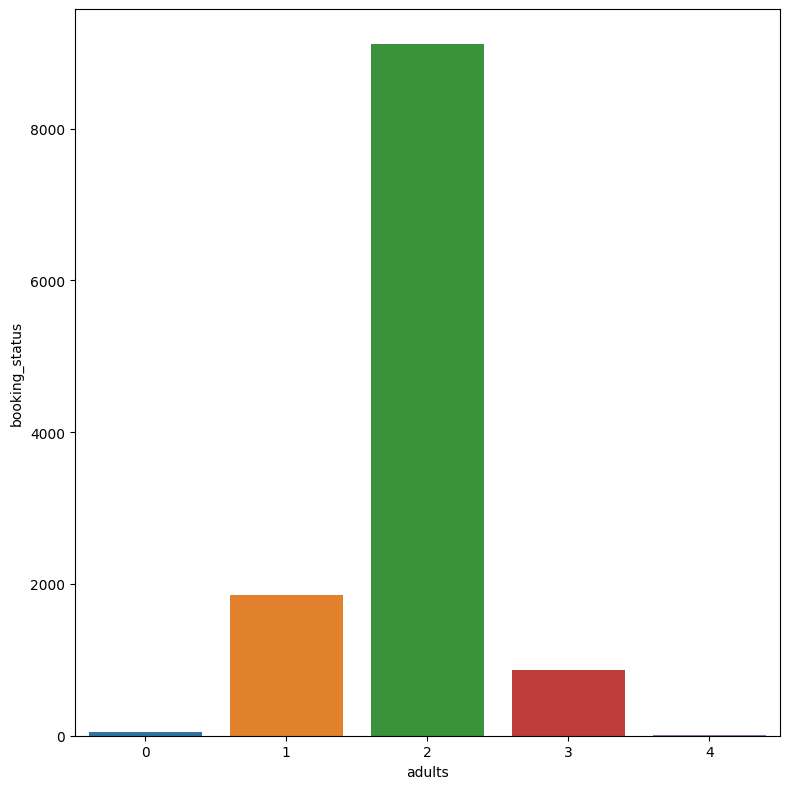

In [38]:
#Number of adults brought that cancel their reservation
sns.barplot(adult,x='adults',y='booking_status')

In [39]:
# Number of adults brought in which they don't cancel the reservation
adult2 = nocancel.groupby('adults')[['booking_status']].count().reset_index()
adult2

,adults,booking_status
0,0,95
1,1,5839
2,2,16989
3,3,1454
4,4,13


<AxesSubplot: xlabel='adults', ylabel='booking_status'>

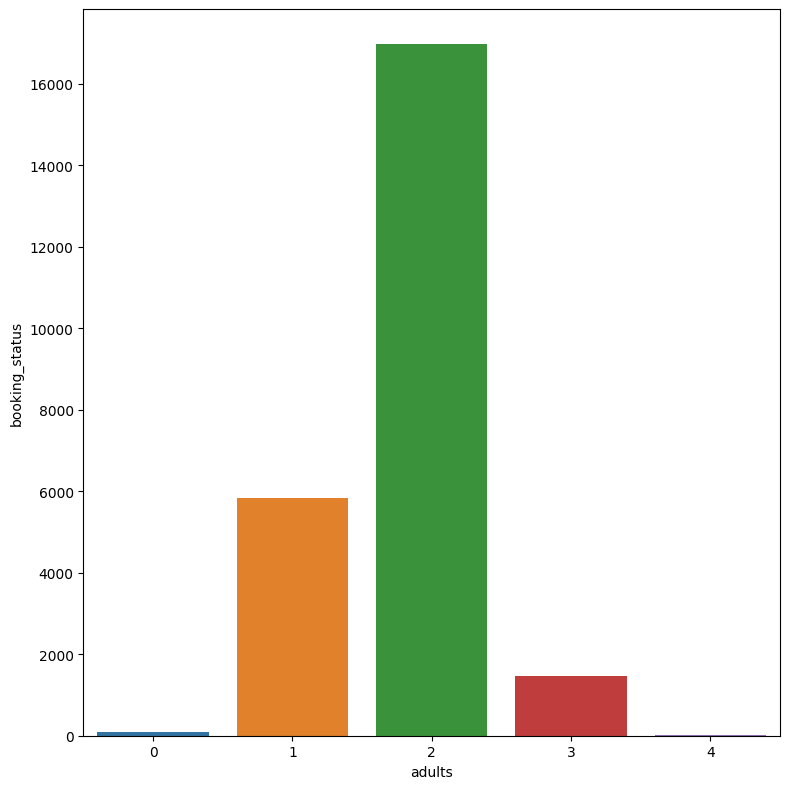

In [40]:
# Number of adults brought in which they don't cancel the reservation
sns.barplot(adult2,x='adults',y='booking_status')

C:\Users\user\AppData\Local\Temp\ipykernel_11320\4285714312.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g=sns.kdeplot(data['adults'][data['booking_status']==0], color='Red',shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11320\4285714312.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g=sns.kdeplot(data['adults'][data['booking_status']==1], color='Green',shade=True)


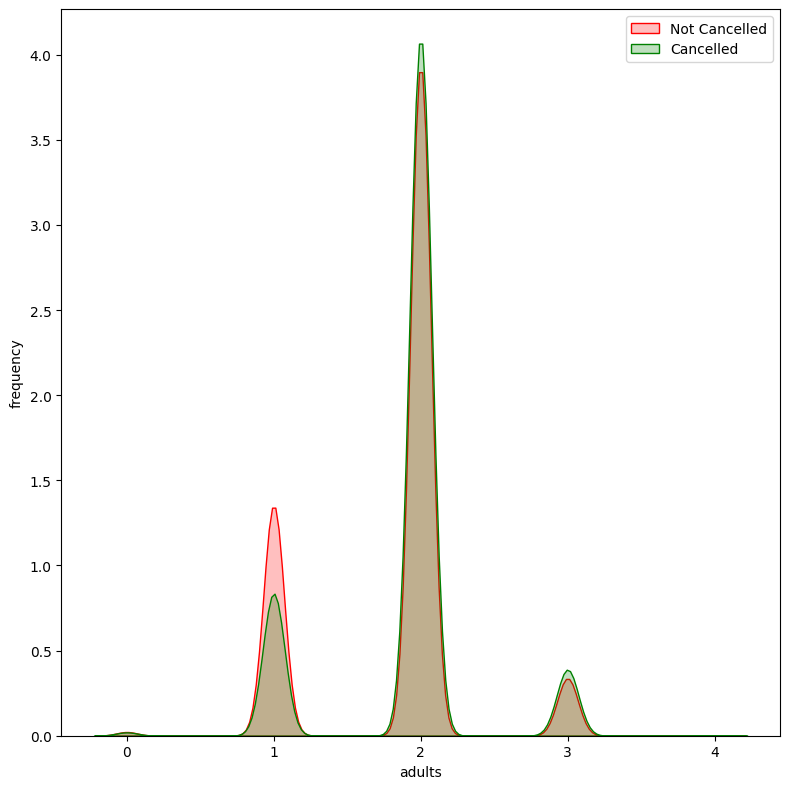

In [41]:
g=sns.kdeplot(data['adults'][data['booking_status']==0], color='Red',shade=True)
g=sns.kdeplot(data['adults'][data['booking_status']==1], color='Green',shade=True)
g.set_xlabel('adults')
g.set_ylabel('frequency')
g.legend(['Not Cancelled','Cancelled'])

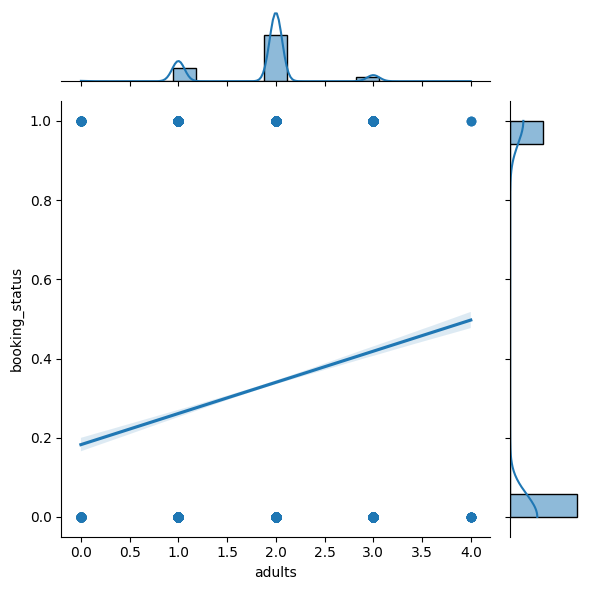

In [42]:
sns.jointplot(x='adults', y='booking_status', data=data, kind="reg")

Key Takeaway: Kebanyakan tamu yang datang ke hotel berjumlah dua orang dewasa. Asumsi yang muncul adalah kebanyakan merupakan pasangan. Perbandingan antara yang membatalkan dan tidak membatalkan booking cukup seimbang di masing-masing angka orang dewasa. Namun, menariknya justru saat hanya satu orang dewasa, lebih cenderung menahan reservasi ketimbang cancel

## Number of child

In [43]:
#number of children brought but not cancel
child = nocancel.groupby('children')[['booking_status']].count().reset_index()
child

,children,booking_status
0,0,22695
1,1,1078
2,2,601
3,3,14
4,9,1
5,10,1


<AxesSubplot: xlabel='children', ylabel='booking_status'>

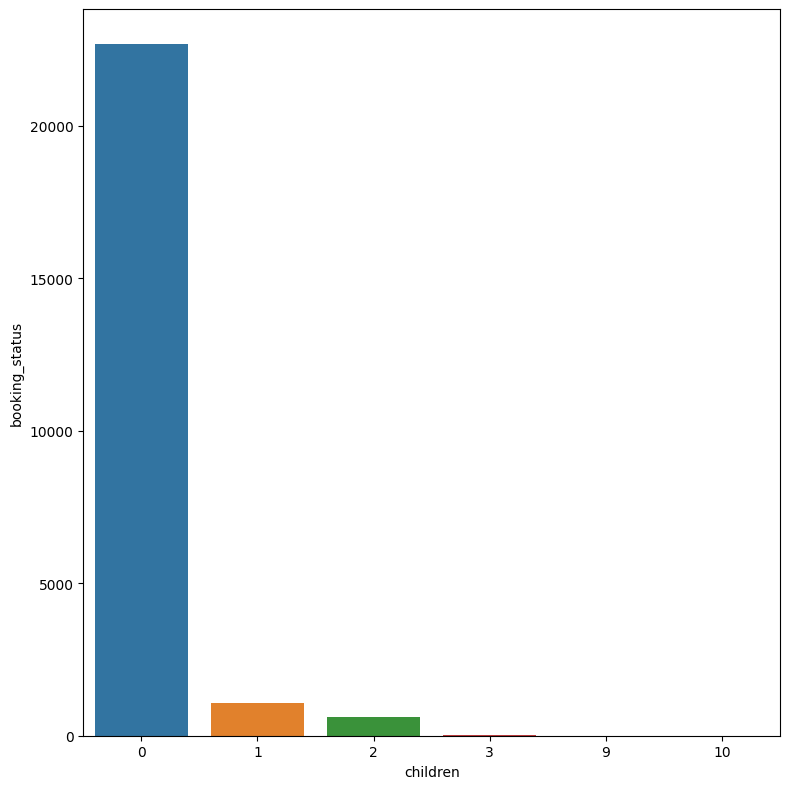

In [44]:
#number of children brought but not cancel
sns.barplot(child,x='children',y='booking_status')

In [45]:
#Number of child brought but cancelled the reservation
canchild = cancel.groupby('children')[['booking_status']].count().reset_index()
canchild

,children,booking_status
0,0,10882
1,1,540
2,2,457
3,3,5
4,9,1


<AxesSubplot: xlabel='children', ylabel='booking_status'>

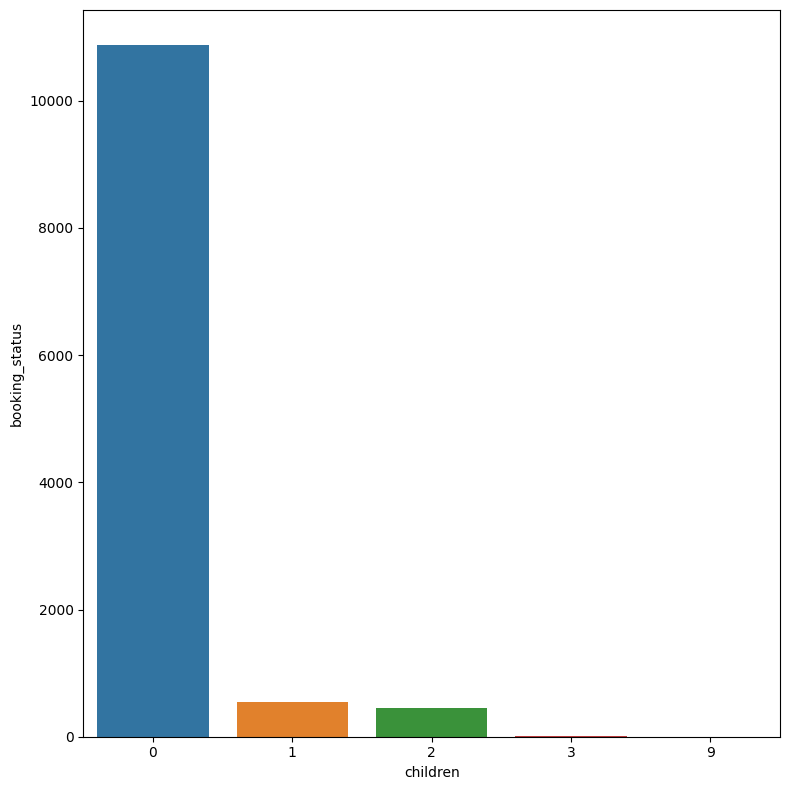

In [46]:
#Number of child brought but cancelled the reservation
sns.barplot(canchild,x='children',y='booking_status')

C:\Users\user\AppData\Local\Temp\ipykernel_11320\2212930401.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g=sns.kdeplot(data['children'][data['booking_status']==0], color='Red',shade=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11320\2212930401.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  g=sns.kdeplot(data['children'][data['booking_status']==1], color='Green',shade=True)


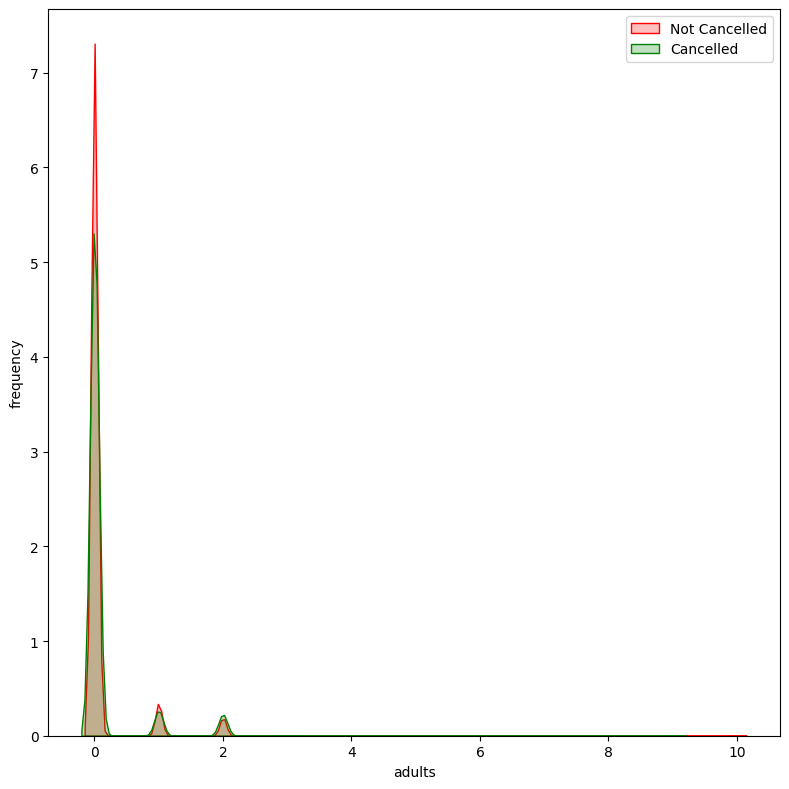

In [47]:
g=sns.kdeplot(data['children'][data['booking_status']==0], color='Red',shade=True)
g=sns.kdeplot(data['children'][data['booking_status']==1], color='Green',shade=True)
g.set_xlabel('adults')
g.set_ylabel('frequency')
g.legend(['Not Cancelled','Cancelled'])

Key takeaway: People who don't bring children is less likely to cancel

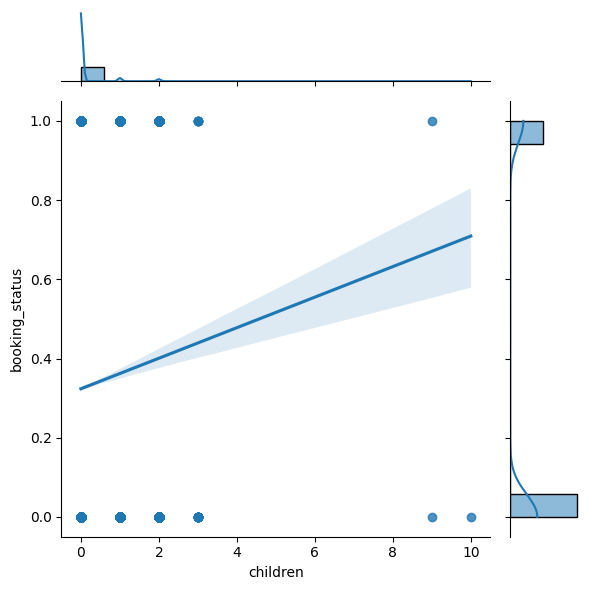

In [48]:
sns.jointplot(x='children', y='booking_status', data=data, kind="reg")

## Weekend or Weekday?

In [49]:
mix = data.loc[(data['weekday_nights']>0) & (data['weekend_nights']>0)]
weekday = data.loc[(data['weekday_nights']>0) & (data['weekend_nights']==0)]
weekend = data.loc[(data['weekend_nights']>0) & (data['weekday_nights']==0)]

In [50]:
mix = pd.Series(len(mix))
weekday = pd.Series(len(weekday))
weekend = pd.Series(len(weekend))

In [51]:
day = pd.concat([mix,weekday,weekend],axis=0)
day = pd.DataFrame(day).reset_index()
day.drop(columns='index',axis=1,inplace=True)
day

,0
0,17094
1,16794
2,2309


In [52]:
day.rename(columns={0:'Count'},inplace=True)
day.rename(index={0:'mix'},inplace=True)
day.rename(index={1:'weekday'},inplace=True)
day.rename(index={2:'weekend'},inplace=True)

In [53]:
day = day.reset_index()
day.rename(columns={'index':'Type'},inplace=True)
day

,Type,Count
0,mix,17094
1,weekday,16794
2,weekend,2309


<AxesSubplot: xlabel='Type', ylabel='Count'>

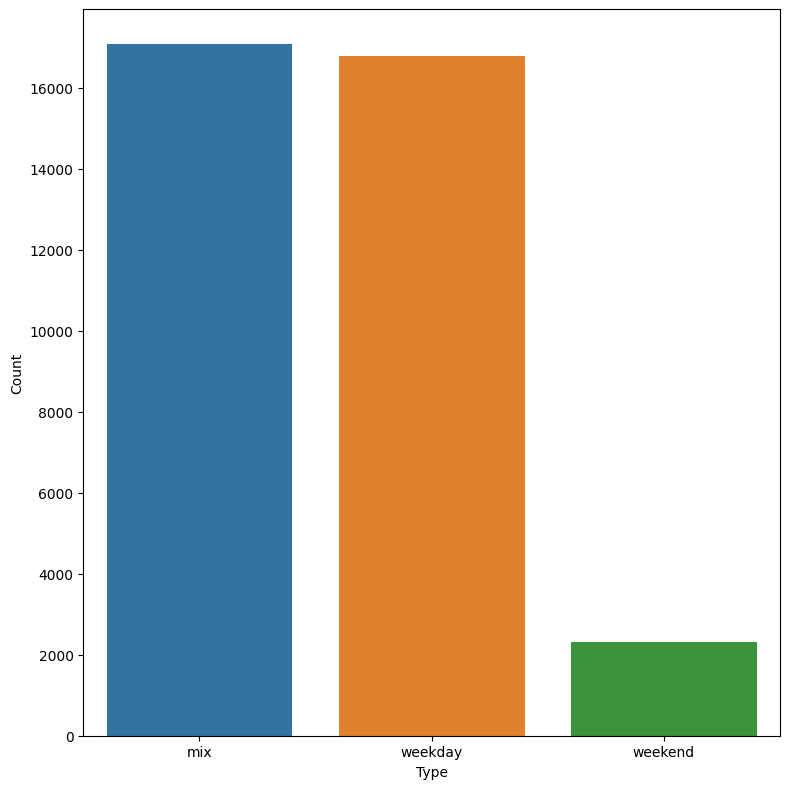

In [54]:
sns.barplot(day,x='Type',y='Count')

Key Takeaway: As we can see, people tend to book a hotel in a weekday going straight to the weekend (mix) instead just for the weekend. Other than that, it is surprisingly low how people stay in a hotel for just the weekend. Instead, they tend to stay during the weekday. However, this should be taken with a grain of salt as context is very much important. Most of them could just be on a business trip, or the data was taken during the holiday. We need more insight regarding this.

In [55]:
mix = data.loc[(data['weekday_nights']>0) & (data['weekend_nights']>0)]
weekday = data.loc[(data['weekday_nights']>0) & (data['weekend_nights']==0)]
weekend = data.loc[(data['weekend_nights']>0) & (data['weekday_nights']==0)]

# FEATURE CORRELATION

In [56]:
corr = data.corr()
corr

C:\Users\user\AppData\Local\Temp\ipykernel_11320\2601176157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,adults,children,weekend_nights,weekday_nights,parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_room_price,request_num,booking_status
adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.284005,0.189401,0.086920
children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.361201,0.124486,0.033078
weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.032489,0.060593,0.061563
weekday_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,-0.009777,0.045994,0.092996
parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.070701,0.087922,-0.086185
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.100418,-0.101645,0.438538
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.162194,0.053205,0.179529
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.067247,0.110552,-0.011233
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.014852,0.018352,0.010629
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.127766,-0.011820,-0.107287


In [57]:
plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True

<AxesSubplot: >

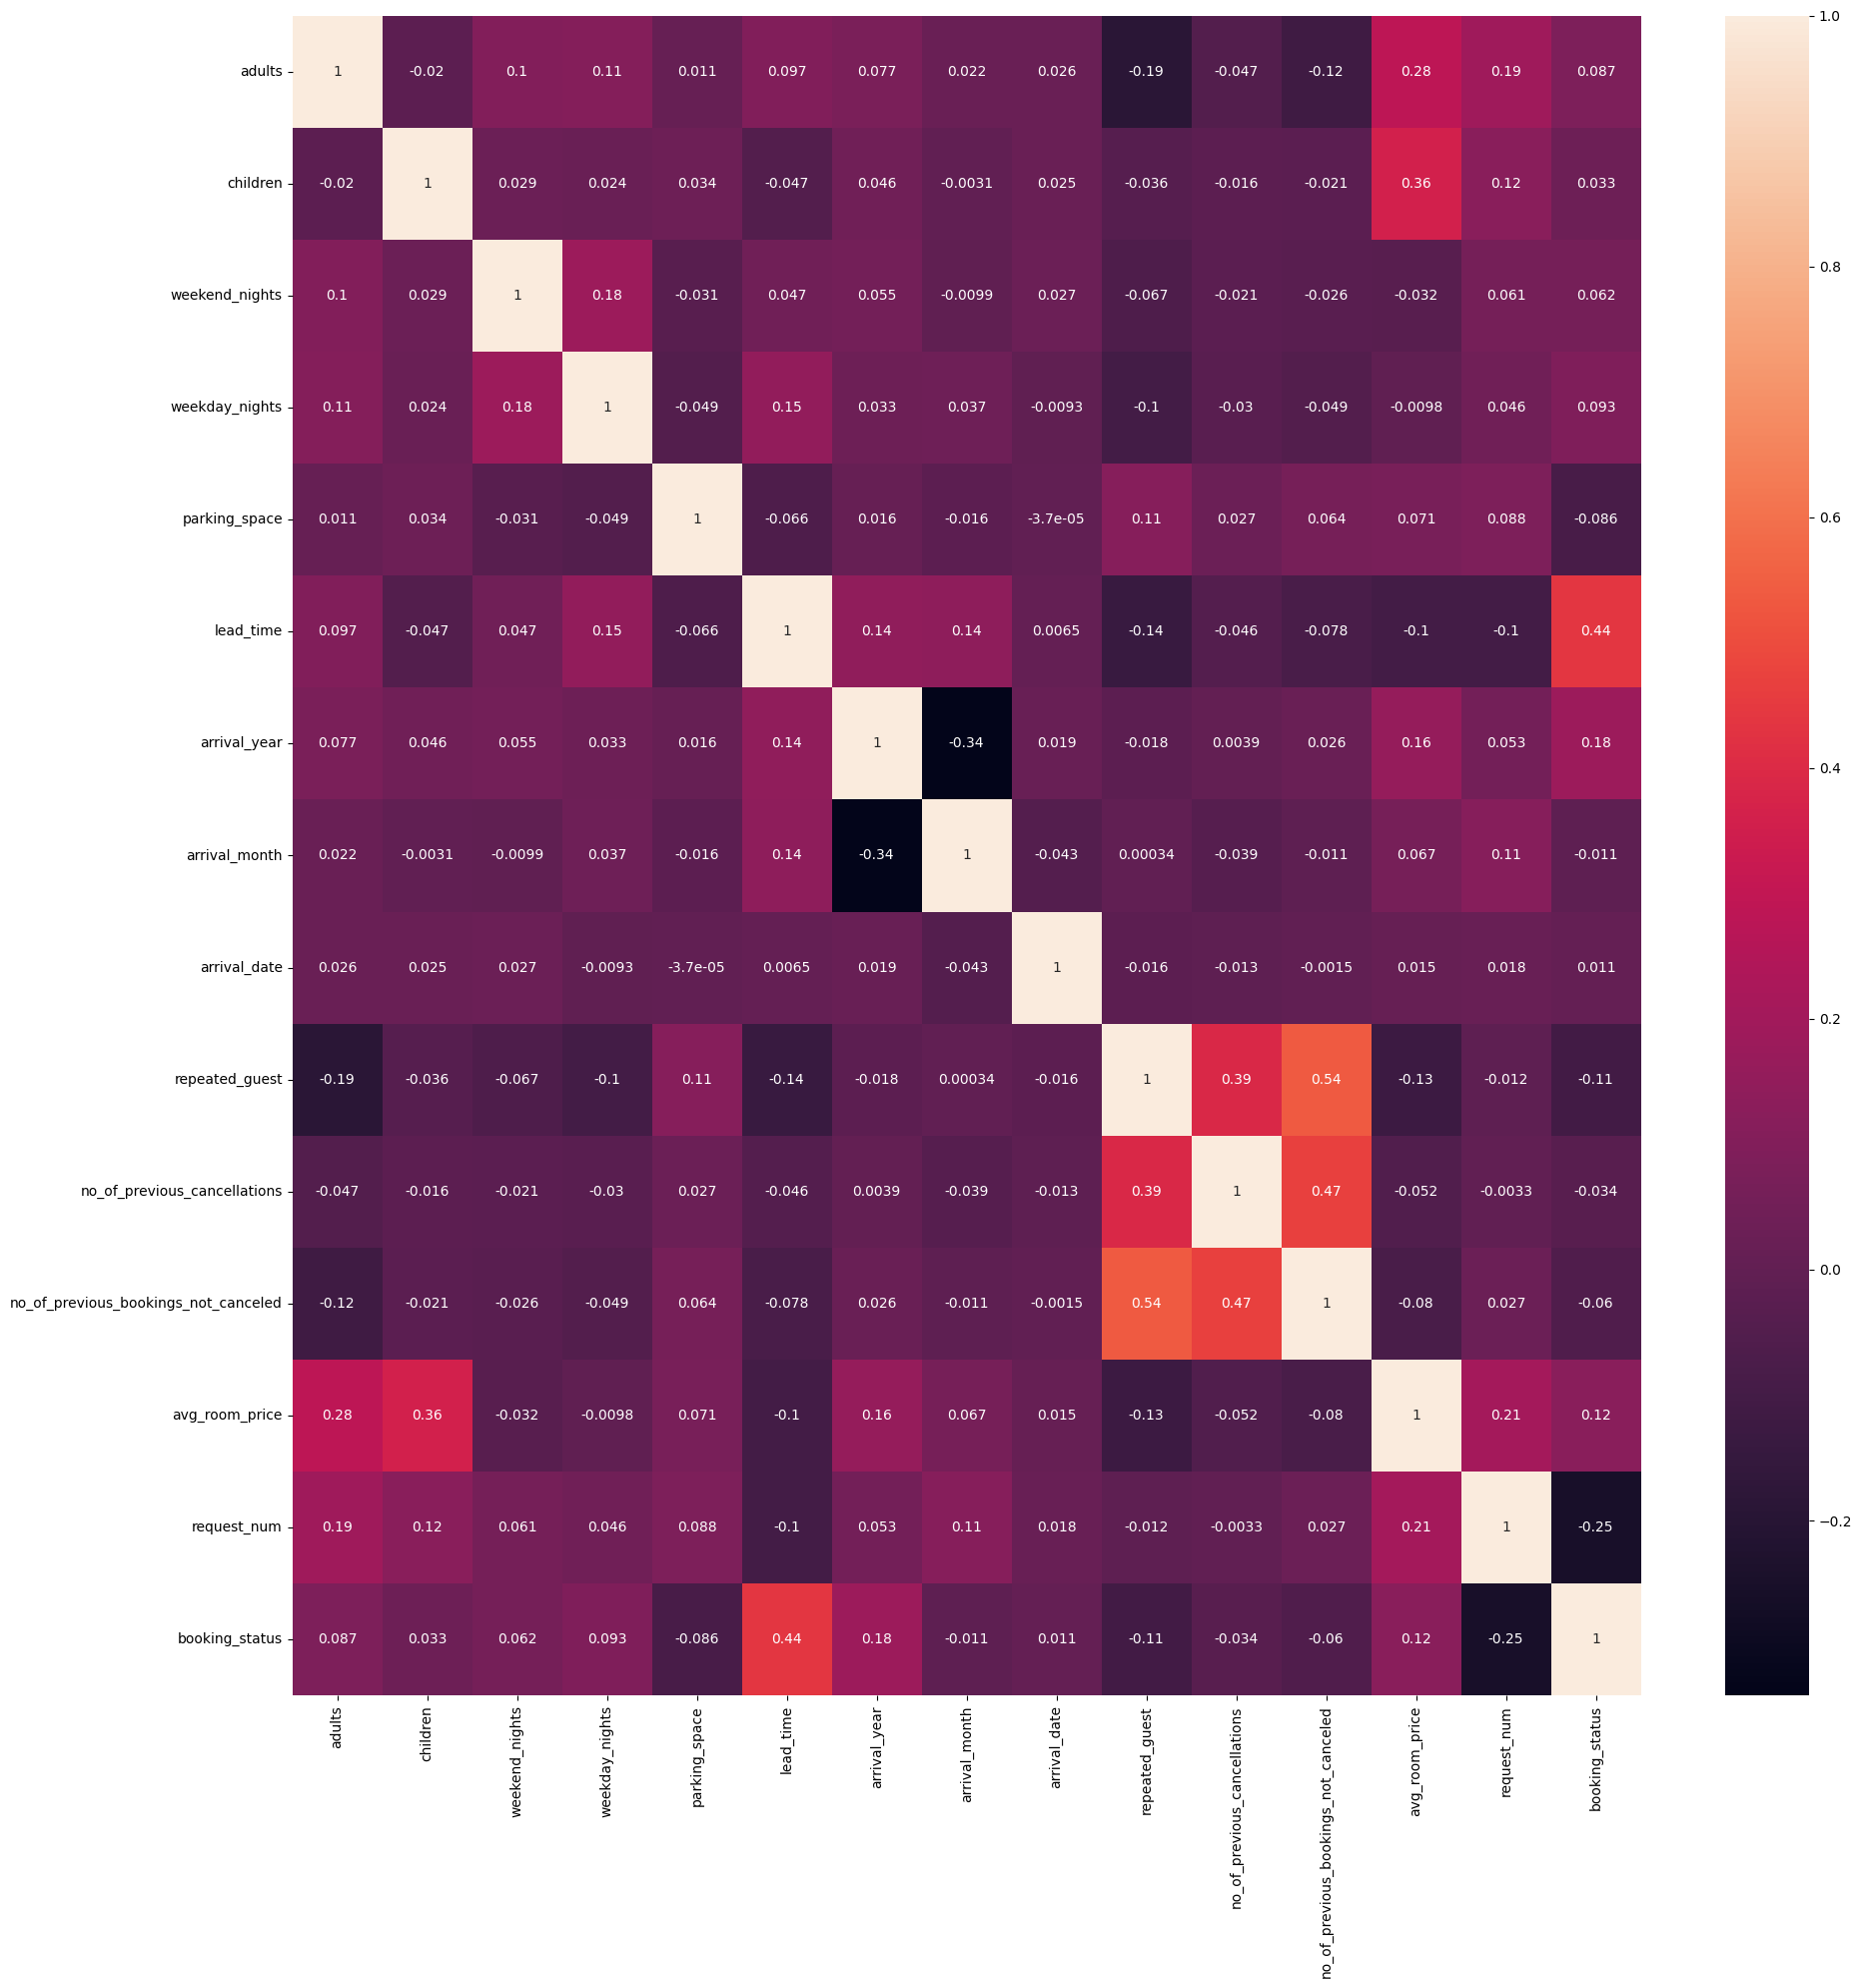

In [58]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,
            annot=True)

# FEATURE SCALLING AND ENCODING

In [59]:
#Importing Scaler and Encoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

In [60]:
data['meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [61]:
data['room_type'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [62]:
rscaler = RobustScaler()

In [63]:
ohc = OneHotEncoder(handle_unknown = 'ignore')

In [64]:
data.drop(columns=['Booking_ID'], axis=1, inplace=True)

In [65]:
data.head()

,adults,children,weekend_nights,weekday_nights,meal_plan,parking_space,room_type,lead_time,arrival_year,arrival_month,arrival_date,market_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_room_price,request_num,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


Booking ID is dropped because it will not be used

In [66]:
# Copying the dataset for scalling
data_scaled = data.copy()

In [67]:
data_scaled.head()

,adults,children,weekend_nights,weekday_nights,meal_plan,parking_space,room_type,lead_time,arrival_year,arrival_month,arrival_date,market_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_room_price,request_num,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


In [68]:
# SCalling the numerical features
data_scaled['adults'] = rscaler.fit_transform(data_scaled[['adults']])
data_scaled['children'] = rscaler.fit_transform(data_scaled[['children']])
data_scaled['weekend_nights'] = rscaler.fit_transform(data_scaled[['weekend_nights']])
data_scaled['weekday_nights'] = rscaler.fit_transform(data_scaled[['weekday_nights']])
data_scaled['lead_time'] = rscaler.fit_transform(data_scaled[['lead_time']])
data_scaled['no_of_previous_cancellations'] = rscaler.fit_transform(data_scaled[['no_of_previous_cancellations']])
data_scaled['no_of_previous_bookings_not_canceled'] = rscaler.fit_transform(data_scaled[['no_of_previous_bookings_not_canceled']])
data_scaled['avg_room_price'] = rscaler.fit_transform(data_scaled[['avg_room_price']])
data_scaled['request_num'] = rscaler.fit_transform(data_scaled[['request_num']])

In [69]:
data_scaled.head()

,adults,children,weekend_nights,weekday_nights,meal_plan,parking_space,room_type,lead_time,arrival_year,arrival_month,arrival_date,market_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_room_price,request_num,booking_status
0,0.0,0.0,0.0,0.0,Meal Plan 1,0,Room_Type 1,1.532110,2017,10,2,Offline,0,0.0,0.0,-0.883333,0.0,0
1,0.0,0.0,0.5,0.5,Not Selected,0,Room_Type 1,-0.477064,2018,11,6,Online,0,0.0,0.0,0.185385,1.0,0
2,-1.0,0.0,0.5,-0.5,Meal Plan 1,0,Room_Type 1,-0.513761,2018,2,28,Online,0,0.0,0.0,-1.011538,0.0,1
3,0.0,0.0,-0.5,0.0,Meal Plan 1,0,Room_Type 1,1.412844,2018,5,20,Online,0,0.0,0.0,0.014103,0.0,1
4,0.0,0.0,0.0,-0.5,Not Selected,0,Room_Type 1,-0.082569,2018,4,11,Online,0,0.0,0.0,-0.126923,0.0,1


Numerical data is already scaled, now is time to transform categorical data using One Hot Encoder

In [70]:
col = sorted(data['meal_plan'].unique().tolist()) + sorted(data['room_type'].unique().tolist()) + sorted(data['market_type'].unique().tolist())

In [71]:
#Encoding
enc_df = pd.DataFrame(ohc.fit_transform(data_scaled[['meal_plan', 'room_type', 'market_type']]).toarray(), columns=col)

In [72]:
enc_df.head()

,Meal Plan 1,Meal Plan 2,Meal Plan 3,Not Selected,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Aviation,Complementary,Corporate,Offline,Online
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [73]:
#Joining the scaled dataframe with encoded dataframe
data_scaled = data_scaled.join(enc_df)
data_scaled.head()

,adults,children,weekend_nights,weekday_nights,meal_plan,parking_space,room_type,lead_time,arrival_year,arrival_month,...,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Aviation,Complementary,Corporate,Offline,Online
0,0.0,0.0,0.0,0.0,Meal Plan 1,0,Room_Type 1,1.532110,2017,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.5,0.5,Not Selected,0,Room_Type 1,-0.477064,2018,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.0,0.0,0.5,-0.5,Meal Plan 1,0,Room_Type 1,-0.513761,2018,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,-0.5,0.0,Meal Plan 1,0,Room_Type 1,1.412844,2018,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,-0.5,Not Selected,0,Room_Type 1,-0.082569,2018,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [74]:
# Dropping the unused features
data_scaled.drop(columns=['meal_plan','room_type','market_type', 'arrival_year','arrival_month','arrival_date'],axis=1,inplace=True)

In [75]:
# joining dummies to the dataframe
final_data=data_scaled.copy()

In [76]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   adults                                36275 non-null  float64
 1   children                              36275 non-null  float64
 2   weekend_nights                        36275 non-null  float64
 3   weekday_nights                        36275 non-null  float64
 4   parking_space                         36275 non-null  int64  
 5   lead_time                             36275 non-null  float64
 6   repeated_guest                        36275 non-null  int64  
 7   no_of_previous_cancellations          36275 non-null  float64
 8   no_of_previous_bookings_not_canceled  36275 non-null  float64
 9   avg_room_price                        36275 non-null  float64
 10  request_num                           36275 non-null  float64
 11  booking_status 

All the features are scaled, except for the categorical 1 and 0 ones like parking space, repeated guest, and booking status

# SPLITTING X Y AND BALANCING DATA

In [77]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

In [78]:
#Splitting X and Y
X = final_data.drop(columns=['booking_status'],axis=1)
y = final_data['booking_status']

In [79]:
#split train-rest data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [80]:
X_train.shape

(27206, 27)

In [81]:
y_train.shape

(27206,)

In [82]:
y_train.value_counts()

0    18328
1     8878
Name: booking_status, dtype: int64

In [83]:
print('Before Oversampling: ',Counter(y_train))
#defining smote
SMOTE = SMOTE(random_state=0)

#fit and apply the transform
X_train_smote, y_train_smote = SMOTE.fit_resample(X_train,y_train)

#summarize class distribution
print('After Oversampling: ',Counter(y_train_smote))

Before Oversampling:  Counter({0: 18328, 1: 8878})
After Oversampling:  Counter({0: 18328, 1: 18328})


# MACHINE LEARNING MODELING

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Decision Tree

In [85]:
# Decision Tree without resampling
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [86]:
# Decision Tree with resampling
dt2 = DecisionTreeClassifier(random_state=0)
dt2.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=0)

## RANDOM FOREST CLASSIFIER

In [87]:
# Random Forest without resampling
rf1 = RandomForestClassifier(random_state=0)
rf1.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [88]:
# Random Forest with resampling
rf2 = RandomForestClassifier(random_state=0)
rf2.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=0)

## KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
# KNN without resampling
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [91]:
# KNN with resampling
knn2 = KNeighborsClassifier()
knn2.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

## SVC Linear

In [92]:
from sklearn.svm import SVC

In [93]:
# SVCL without resampling
svc = SVC(kernel='linear',random_state=0)
svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [94]:
# SVCL with resampling
svc2 = SVC(kernel='linear',random_state=0)
svc2.fit(X_train_smote,y_train_smote)

SVC(kernel='linear', random_state=0)

## SVC RBF

In [95]:
# SVCR without resampling
svc3 = SVC(kernel='rbf',random_state=0)
svc3.fit(X_train,y_train)

SVC(random_state=0)

In [96]:
# SVCR with resampling
svc4 = SVC(kernel='rbf',random_state=0)
svc4.fit(X_train_smote,y_train_smote)

SVC(random_state=0)

# MODEL EVALUATION

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, silhouette_score
from sklearn.metrics import classification_report

## DT without resampling

In [98]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6062
           1       0.78      0.77      0.77      3007

    accuracy                           0.85      9069
   macro avg       0.83      0.83      0.83      9069
weighted avg       0.85      0.85      0.85      9069



## DT with resampling

In [99]:
y_pred_dt2 = dt2.predict(X_test)
print(classification_report(y_test, y_pred_dt2))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      6062
           1       0.76      0.79      0.77      3007

    accuracy                           0.85      9069
   macro avg       0.83      0.83      0.83      9069
weighted avg       0.85      0.85      0.85      9069



## Random Forest without resampling

In [100]:
y_pred_rf1 = rf1.predict(X_test)
print(classification_report(y_test, y_pred_rf1))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6062
           1       0.86      0.77      0.82      3007

    accuracy                           0.88      9069
   macro avg       0.88      0.86      0.87      9069
weighted avg       0.88      0.88      0.88      9069



## Random Forest With Resampling

In [101]:
y_pred_rf2 = rf2.predict(X_test)
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      6062
           1       0.82      0.80      0.81      3007

    accuracy                           0.88      9069
   macro avg       0.86      0.86      0.86      9069
weighted avg       0.88      0.88      0.88      9069



## KNN No Resampling

In [102]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      6062
           1       0.80      0.74      0.77      3007

    accuracy                           0.85      9069
   macro avg       0.84      0.82      0.83      9069
weighted avg       0.85      0.85      0.85      9069



## KNN With Resampling

In [103]:
y_pred_knn2 = knn2.predict(X_test)
print(classification_report(y_test, y_pred_knn2))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      6062
           1       0.72      0.81      0.76      3007

    accuracy                           0.83      9069
   macro avg       0.81      0.83      0.82      9069
weighted avg       0.84      0.83      0.84      9069



## SVCL No Resampling

In [104]:
y_pred_svc = svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      6062
           1       0.75      0.59      0.66      3007

    accuracy                           0.80      9069
   macro avg       0.78      0.75      0.76      9069
weighted avg       0.79      0.80      0.79      9069



## SVCL With Resampling

In [105]:
y_pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, y_pred_svc2))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      6062
           1       0.63      0.77      0.69      3007

    accuracy                           0.77      9069
   macro avg       0.75      0.77      0.76      9069
weighted avg       0.79      0.77      0.78      9069



## SVC RBF No Resampling

In [106]:
y_pred_svc3 = svc3.predict(X_test)
print(classification_report(y_test, y_pred_svc3))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      6062
           1       0.81      0.61      0.70      3007

    accuracy                           0.83      9069
   macro avg       0.82      0.77      0.79      9069
weighted avg       0.82      0.83      0.82      9069



## SVC RBF With Resampling

In [107]:
y_pred_svc4 = svc4.predict(X_test)
print(classification_report(y_test, y_pred_svc4))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86      6062
           1       0.69      0.81      0.74      3007

    accuracy                           0.82      9069
   macro avg       0.79      0.81      0.80      9069
weighted avg       0.83      0.82      0.82      9069



# CHECKING FEATURE IMPORTANCE

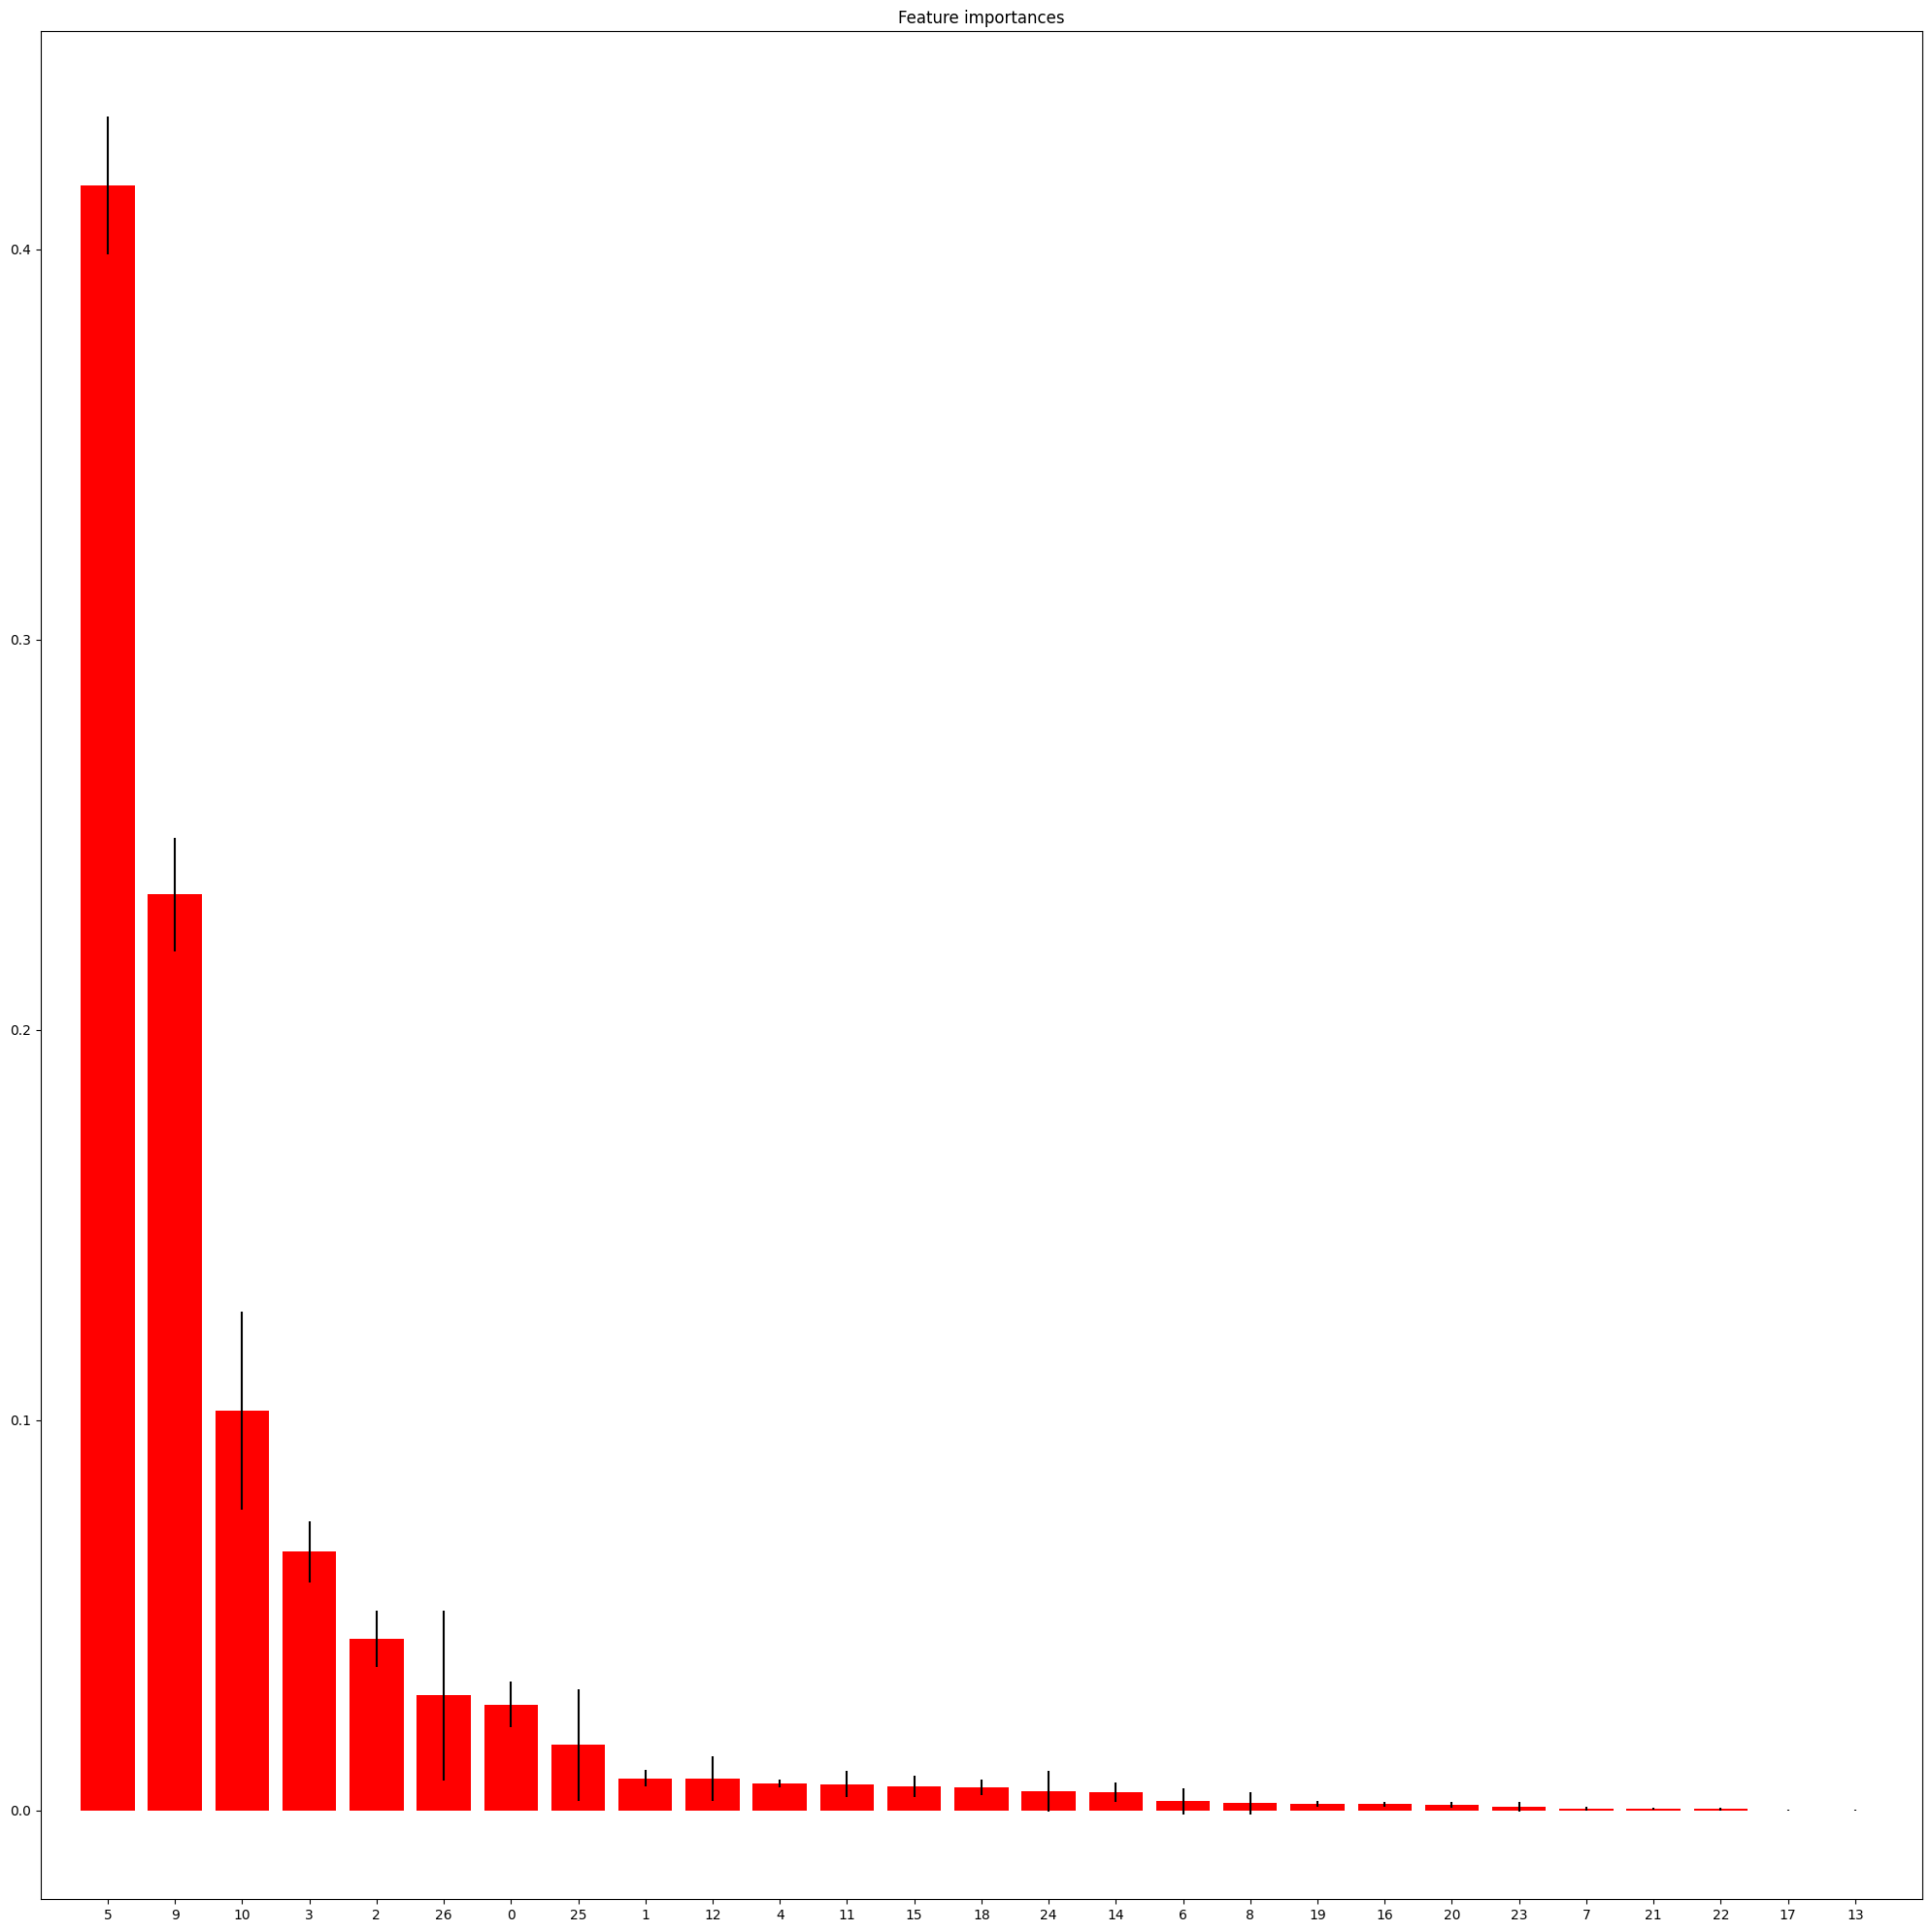

In [108]:
importances = rf1.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf1.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [109]:
plt.rcParams["figure.figsize"] = [20, 10]
plt.rcParams["figure.autolayout"] = True

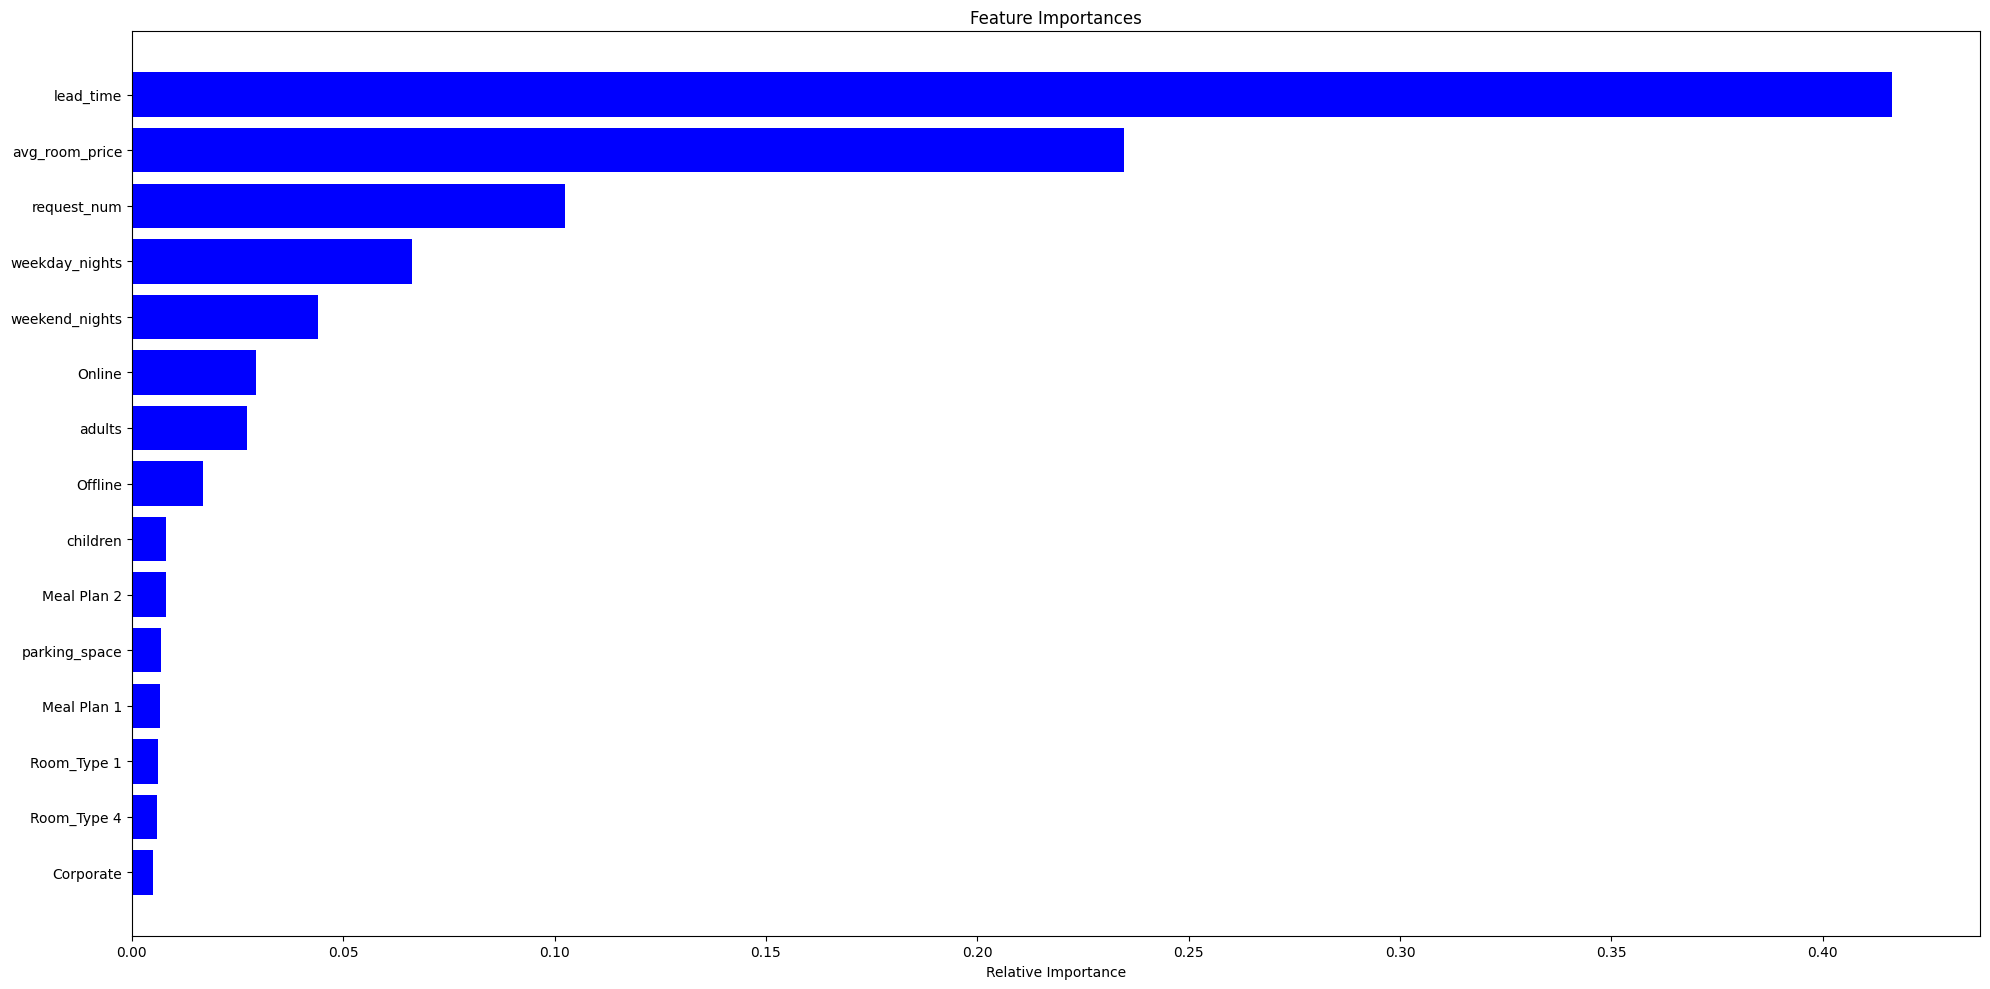

In [110]:
# Checking Feature Importance
features = X.columns
importances = rf1.feature_importances_
indices = np.argsort(importances)[-15:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# RE TRAINING
Training the models with dropping least important features

In [111]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   adults                                36275 non-null  float64
 1   children                              36275 non-null  float64
 2   weekend_nights                        36275 non-null  float64
 3   weekday_nights                        36275 non-null  float64
 4   parking_space                         36275 non-null  int64  
 5   lead_time                             36275 non-null  float64
 6   repeated_guest                        36275 non-null  int64  
 7   no_of_previous_cancellations          36275 non-null  float64
 8   no_of_previous_bookings_not_canceled  36275 non-null  float64
 9   avg_room_price                        36275 non-null  float64
 10  request_num                           36275 non-null  float64
 11  booking_status 

## SPLITTING X AND Y

In [112]:
from imblearn.over_sampling import SMOTE

In [113]:
#Splitting X and Y
# X = final_data['adults','children','lead_time','avg_room_price','request_num','weekday_nights','weekend_nights','Online','Offline']
X = final_data.drop(columns=['parking_space','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled',
                            'Meal Plan 1','Meal Plan 2','Meal Plan 3','Not Selected','Room_Type 1','Room_Type 2','Room_Type 3','Room_Type 4',
                            'Room_Type 5','Room_Type 6','Room_Type 7','Aviation','Complementary','Corporate','booking_status'], axis=1)
y = final_data['booking_status']

In [114]:
#split train-rest data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [115]:
print('Before Oversampling: ',Counter(y_train))
#defining smote
SMOTE = SMOTE(random_state=0)

#fit and apply the transform
X_train_smote, y_train_smote = SMOTE.fit_resample(X_train,y_train)

#summarize class distribution
print('After Oversampling: ',Counter(y_train_smote))

Before Oversampling:  Counter({0: 18328, 1: 8878})
After Oversampling:  Counter({0: 18328, 1: 18328})


In [116]:
# Random Forest without resampling
rf3 = RandomForestClassifier(random_state=0)
rf3.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [117]:
y_pred_rf3 = rf3.predict(X_test)
print(classification_report(y_test, y_pred_rf3))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6062
           1       0.85      0.77      0.81      3007

    accuracy                           0.88      9069
   macro avg       0.87      0.85      0.86      9069
weighted avg       0.88      0.88      0.88      9069



In [118]:
# Random Forest with resampling
rf4 = RandomForestClassifier(random_state=0)
rf4.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=0)

In [119]:
y_pred_rf4 = rf4.predict(X_test)
print(classification_report(y_test, y_pred_rf4))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6062
           1       0.80      0.80      0.80      3007

    accuracy                           0.87      9069
   macro avg       0.85      0.85      0.85      9069
weighted avg       0.87      0.87      0.87      9069



# HYPER PARAMETER TUNING

In [348]:
from sklearn.model_selection import GridSearchCV

In [349]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


# Create the GridSearchCV object
grid_search = GridSearchCV(rf3, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.8831426602343211


In [350]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [351]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=0)

In [352]:
best_grid = grid_search.best_estimator_

In [353]:
y_pred_grid = best_grid.predict(X_test)
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6062
           1       0.97      0.92      0.95      3007

    accuracy                           0.97      9069
   macro avg       0.97      0.95      0.96      9069
weighted avg       0.97      0.97      0.97      9069

